In [16]:
import os
from skimage.transform import resize
from skimage.io import imread
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Load in and process the data

In [6]:
train_dir = os.path.join('/Users/luctheduke/Desktop/UVM Grad School/Year 2/STAT 287 - DS 1/chest_xray/train')
test_dir = os.path.join('/Users/luctheduke/Desktop/UVM Grad School/Year 2/STAT 287 - DS 1/chest_xray/test')

In [7]:
def load_Data(dir):
    labels=['NORMAL','PNEUMONIA']
    X=[] 
    Y=[] 

    for l in labels:
        
        print(f'loading... category : {l}')
        path=os.path.join(dir, l)
        for img in os.listdir(path):

            # Read in the image with width and height 300 px and 3 layers
            img_array=imread(os.path.join(path,img)) 
            img_resized=resize(img_array,(300,300,3))

            # Flatten X by 255 RGB values
            X.append(img_resized.flatten() / 255)
            Y.append(labels.index(l))
            
        print(f'loaded category:{l} successfully')

    return X, Y

In [8]:
X_train,y_train=load_Data(train_dir)
X_test,y_test=load_Data(test_dir)

loading... category : NORMAL
loaded category:NORMAL successfully
loading... category : PNEUMONIA
loaded category:PNEUMONIA successfully
loading... category : NORMAL
loaded category:NORMAL successfully
loading... category : PNEUMONIA
loaded category:PNEUMONIA successfully


In [34]:
300*300*3

270000

In [33]:
X_train[0].shape

(270000,)

In [24]:
y_train.count(0)/len(y_train), y_train.count(1)/len(y_train)

(0.2570935582822086, 0.7429064417177914)

# Logistic Regression - Modeling & Evaluation

In [25]:
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [29]:
print(classification_report(y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.61      0.72       234
           1       0.80      0.94      0.87       390

    accuracy                           0.82       624
   macro avg       0.83      0.78      0.79       624
weighted avg       0.82      0.82      0.81       624



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


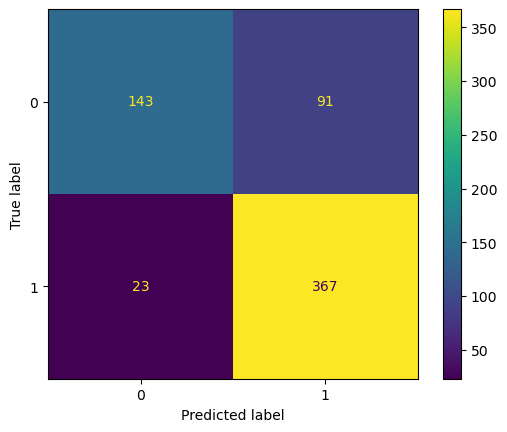

In [30]:
plot_confusion_matrix(log_reg, X_test, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


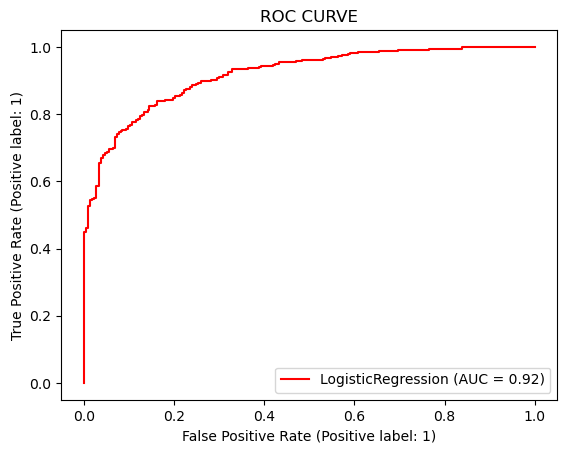

In [31]:
fig=plot_roc_curve(log_reg, X_test, y_test, color='r')
plt.legend()
plt.title("ROC CURVE")
plt.savefig('/Users/luctheduke/Desktop/UVM Grad School/Year 2/STAT 287 - DS 1/stat287_project/images/' + 'logreg_ROC.png')
plt.show()

# Modeling & Evaluation